<a href="https://colab.research.google.com/github/pemba007/motor-ml/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./accelerometer.csv')

In [38]:
df.shape

(153000, 5)

In [39]:
# Remove later

# df = df.iloc[:1000,:]

In [40]:
df.shape

(153000, 5)

In [41]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


# New Section

In [9]:
# Unique values in wconfid, pctid
print("Unique values in wconfid", df['wconfid'].unique())
print("Unique values in pctid", df['pctid'].unique())

Unique values in wconfid [1 2 3]
Unique values in pctid [ 20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100]


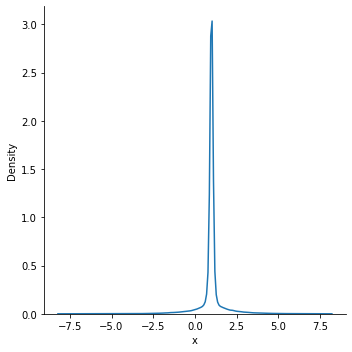

In [10]:
sns.displot(x = df['x'], kind='kde')

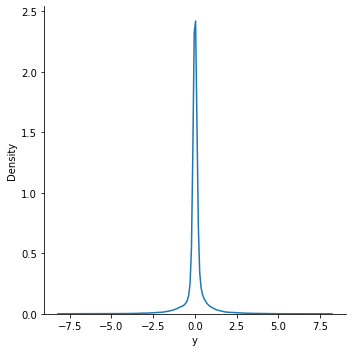

In [11]:
sns.displot(x = df['y'], kind='kde')

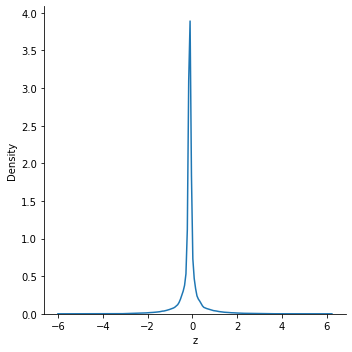

In [12]:
sns.displot(x = df['z'], kind='kde')

In [42]:
# Separating target variable
y_original = df['wconfid'] 
df.drop(columns=['wconfid'], inplace=True)

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
def delinearize(arr):
  temp = list()
  for x in arr:
    temp.append(np.where(x == 1)[0][0])
  return temp


# Implementing ANN with 5 fold

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, multilabel_confusion_matrix,roc_curve, roc_auc_score

skf = StratifiedKFold(n_splits=5)

clf = MLPClassifier(max_iter=100)

classifier = OneVsRestClassifier(
  clf
)

conf_matrixes = list()

accuracy_scores = list()

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)

all_fprs = list()
all_tprs = list()
all_roc_aucs = list()

y = y_original

# for train_index, test_index in skf.split(df, y):
for k, (train_index, test_index) in enumerate(skf.split(df, y)):
    # print("Fold", k)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    # print("ASdASKLjfalk")
    # print(y_train)

    y_before_train = y_train
    y_before_test = y_test

    y_train = label_binarize(y_train, classes=[1, 2, 3])
    y_test = label_binarize(y_test, classes=[1, 2, 3])

    n_classes = y_train.shape[1]

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # print("Before")

    y_score = y_pred
    # print("Y_Cscore", y_score)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    all_fprs.append(fpr)
    all_tprs.append(tpr)
    all_roc_aucs.append(roc_auc)

    # print("1", y_before_train)
    # print('22', y_before_test)

    # To get the metrics
    # y_before_train = y_before_train.reshape(-1, 1)
    clf.fit(X_train, y_before_train)
  
    un_y_pred = clf.predict(X_test)
    
    print("2")
    # Calculating accuracy score
    accuracy_scores.append(accuracy_score(y_before_test, un_y_pred))

    print("3")
    # Calculating confusion matrix
    cmf = multilabel_confusion_matrix(y_before_test, un_y_pred)
    conf_matrixes.append(cmf)

    actual_classes = np.append(actual_classes, y_before_test)
    predicted_classes = np.append(predicted_classes, un_y_pred)

    # Calculating values for the ROC Curve
    

TRAIN: [ 10200  10201  10202 ... 152997 152998 152999] TEST: [     0      1      2 ... 112197 112198 112199]
2
3
TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 10200  10201  10202 ... 122397 122398 122399]
2
3
TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 20400  20401  20402 ... 132597 132598 132599]
2
3
TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 30600  30601  30602 ... 142797 142798 142799]
2
3
TRAIN: [     0      1      2 ... 142797 142798 142799] TEST: [ 40800  40801  40802 ... 152997 152998 152999]
2
3


## Creating ROC graphs

In [17]:
# Creating values for each classes

class_1_fpr = list()
class_2_fpr = list()
class_3_fpr = list()

class_1_tpr = list()
class_2_tpr = list()
class_3_tpr = list()

class_1_roc_auc = list()
class_2_roc_auc = list()
class_3_roc_auc = list()

for x in range(5):
  class_1_fpr.append(all_fprs[x][0])
  class_2_fpr.append(all_fprs[x][1])
  class_3_fpr.append(all_fprs[x][2])

  class_1_tpr.append(all_tprs[x][0])
  class_2_tpr.append(all_tprs[x][1])
  class_3_tpr.append(all_tprs[x][2])

  class_1_roc_auc.append(all_roc_aucs[x][0])
  class_2_roc_auc.append(all_roc_aucs[x][1])
  class_3_roc_auc.append(all_roc_aucs[x][2])

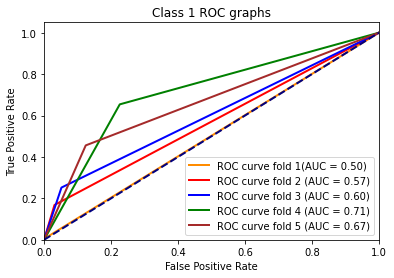

In [18]:
plt.figure()
lw = 2
plt.plot(
    class_1_fpr[0],
    class_1_tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve fold 1(AUC = %0.2f)" % class_1_roc_auc[0],
)
plt.plot(
    class_1_fpr[1],
    class_1_tpr[1],
    color="red",
    lw=lw,
    label="ROC curve fold 2 (AUC = %0.2f)" % class_1_roc_auc[1],
)
plt.plot(
    class_1_fpr[2],
    class_1_tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve fold 3 (AUC = %0.2f)" % class_1_roc_auc[2],
)
plt.plot(
    class_1_fpr[3],
    class_1_tpr[3],
    color="green",
    lw=lw,
    label="ROC curve fold 4 (AUC = %0.2f)" % class_1_roc_auc[3],
)

plt.plot(
    class_1_fpr[4],
    class_1_tpr[4],
    color="brown",
    lw=lw,
    label="ROC curve fold 5 (AUC = %0.2f)" % class_1_roc_auc[4],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Class 1 ROC graphs")
plt.legend(loc="lower right")
plt.show()

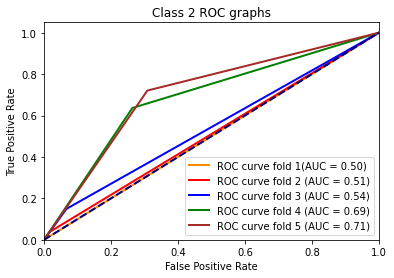

In [19]:
plt.figure()
lw = 2
plt.plot(
    class_2_fpr[0],
    class_2_tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve fold 1(AUC = %0.2f)" % class_2_roc_auc[0],
)
plt.plot(
    class_2_fpr[1],
    class_2_tpr[1],
    color="red",
    lw=lw,
    label="ROC curve fold 2 (AUC = %0.2f)" % class_2_roc_auc[1],
)
plt.plot(
    class_2_fpr[2],
    class_2_tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve fold 3 (AUC = %0.2f)" % class_2_roc_auc[2],
)
plt.plot(
    class_2_fpr[3],
    class_2_tpr[3],
    color="green",
    lw=lw,
    label="ROC curve fold 4 (AUC = %0.2f)" % class_2_roc_auc[3],
)

plt.plot(
    class_2_fpr[4],
    class_2_tpr[4],
    color="brown",
    lw=lw,
    label="ROC curve fold 5 (AUC = %0.2f)" % class_2_roc_auc[4],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Class 2 ROC graphs")
plt.legend(loc="lower right")
plt.show()

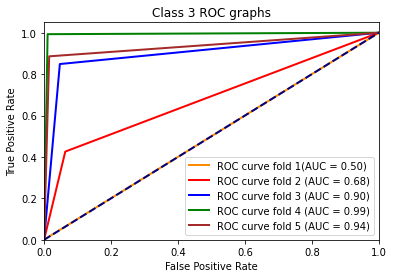

In [20]:
plt.figure()
lw = 2
plt.plot(
    class_3_fpr[0],
    class_3_tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve fold 1(AUC = %0.2f)" % class_3_roc_auc[0],
)
plt.plot(
    class_3_fpr[1],
    class_3_tpr[1],
    color="red",
    lw=lw,
    label="ROC curve fold 2 (AUC = %0.2f)" % class_3_roc_auc[1],
)
plt.plot(
    class_3_fpr[2],
    class_3_tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve fold 3 (AUC = %0.2f)" % class_3_roc_auc[2],
)
plt.plot(
    class_3_fpr[3],
    class_3_tpr[3],
    color="green",
    lw=lw,
    label="ROC curve fold 4 (AUC = %0.2f)" % class_3_roc_auc[3],
)

plt.plot(
    class_3_fpr[4],
    class_3_tpr[4],
    color="brown",
    lw=lw,
    label="ROC curve fold 5 (AUC = %0.2f)" % class_3_roc_auc[4],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Class 3 ROC graphs")
plt.legend(loc="lower right")
plt.show()

In [21]:
cm = multilabel_confusion_matrix(actual_classes, predicted_classes)

res = []

for l in [0,1,2]:
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

frame = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

total_accuracy = accuracy_score(actual_classes, predicted_classes)
print("The total accuracy is", total_accuracy)

The total accuracy is 0.5728562091503268


In [22]:
frame

,Class,Sensitivity(Recall),Specificity,F1 score
0,1,0.661863,0.567206,0.523739
1,2,0.376333,0.840931,0.444190
2,3,0.680373,0.951147,0.765290


## Changing classifier hidden layers

In [44]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, multilabel_confusion_matrix,roc_curve, roc_auc_score

skf = StratifiedKFold(n_splits=5)

y = y_original

clf = MLPClassifier(hidden_layer_sizes=(200,),
    max_iter=50,
    alpha=1e-4,
    verbose=10,
    learning_rate_init=0.33,)

classifier = OneVsRestClassifier(
  clf
)

conf_matrixes = list()

accuracy_scores = list()

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)

all_fprs = list()
all_tprs = list()
all_roc_aucs = list()

# for train_index, test_index in skf.split(df, y):
for k, (train_index, test_index) in enumerate(skf.split(df, y)):
    # print("Fold", k)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    # print("ASdASKLjfalk")
    # print(y_train)

    y_before_train = y_train
    y_before_test = y_test

    y_train = label_binarize(y_train, classes=[1, 2, 3])
    y_test = label_binarize(y_test, classes=[1, 2, 3])

    n_classes = y_train.shape[1]

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # print("Before")

    y_score = y_pred
    # print("Y_Cscore", y_score)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    all_fprs.append(fpr)
    all_tprs.append(tpr)
    all_roc_aucs.append(roc_auc)

    # print("1", y_before_train)
    # print('22', y_before_test)

    # To get the metrics
    # y_before_train = y_before_train.reshape(-1, 1)
    clf.fit(X_train, y_before_train)
  
    un_y_pred = clf.predict(X_test)
  
    # Calculating accuracy score
    accuracy_scores.append(accuracy_score(y_before_test, un_y_pred))

    # Calculating confusion matrix
    cmf = multilabel_confusion_matrix(y_before_test, un_y_pred)
    conf_matrixes.append(cmf)

    actual_classes = np.append(actual_classes, y_before_test)
    predicted_classes = np.append(predicted_classes, un_y_pred)

    # Calculating values for the ROC Curve
    

TRAIN: [ 10200  10201  10202 ... 152997 152998 152999] TEST: [     0      1      2 ... 112197 112198 112199]
Iteration 1, loss = 0.77659663
Iteration 2, loss = 0.63857436
Iteration 3, loss = 0.63896925
Iteration 4, loss = 0.63916628
Iteration 5, loss = 0.63946264
Iteration 6, loss = 0.63970339
Iteration 7, loss = 0.63902005
Iteration 8, loss = 0.63897504
Iteration 9, loss = 0.63916370
Iteration 10, loss = 0.63807172
Iteration 11, loss = 0.63894422
Iteration 12, loss = 0.63887689
Iteration 13, loss = 0.63886607
Iteration 14, loss = 0.63958912
Iteration 15, loss = 0.63865044
Iteration 16, loss = 0.63933424
Iteration 17, loss = 0.63861035
Iteration 18, loss = 0.63831669
Iteration 19, loss = 0.63889053
Iteration 20, loss = 0.63836082
Iteration 21, loss = 0.63818245
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72322266
Iteration 2, loss = 0.63837587
Iteration 3, loss = 0.63898450
Iteration 4, loss = 0.63899007
Iteration 5, l

## Creating ROC graphs

In [45]:
# Creating values for each classes

class_1_fpr = list()
class_2_fpr = list()
class_3_fpr = list()

class_1_tpr = list()
class_2_tpr = list()
class_3_tpr = list()

class_1_roc_auc = list()
class_2_roc_auc = list()
class_3_roc_auc = list()

for x in range(5):
  class_1_fpr.append(all_fprs[x][0])
  class_2_fpr.append(all_fprs[x][1])
  class_3_fpr.append(all_fprs[x][2])

  class_1_tpr.append(all_tprs[x][0])
  class_2_tpr.append(all_tprs[x][1])
  class_3_tpr.append(all_tprs[x][2])

  class_1_roc_auc.append(all_roc_aucs[x][0])
  class_2_roc_auc.append(all_roc_aucs[x][1])
  class_3_roc_auc.append(all_roc_aucs[x][2])

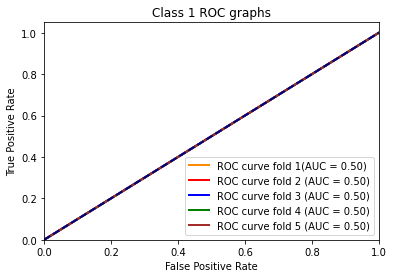

In [46]:
plt.figure()
lw = 2
plt.plot(
    class_1_fpr[0],
    class_1_tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve fold 1(AUC = %0.2f)" % class_1_roc_auc[0],
)
plt.plot(
    class_1_fpr[1],
    class_1_tpr[1],
    color="red",
    lw=lw,
    label="ROC curve fold 2 (AUC = %0.2f)" % class_1_roc_auc[1],
)
plt.plot(
    class_1_fpr[2],
    class_1_tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve fold 3 (AUC = %0.2f)" % class_1_roc_auc[2],
)
plt.plot(
    class_1_fpr[3],
    class_1_tpr[3],
    color="green",
    lw=lw,
    label="ROC curve fold 4 (AUC = %0.2f)" % class_1_roc_auc[3],
)

plt.plot(
    class_1_fpr[4],
    class_1_tpr[4],
    color="brown",
    lw=lw,
    label="ROC curve fold 5 (AUC = %0.2f)" % class_1_roc_auc[4],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Class 1 ROC graphs")
plt.legend(loc="lower right")
plt.show()

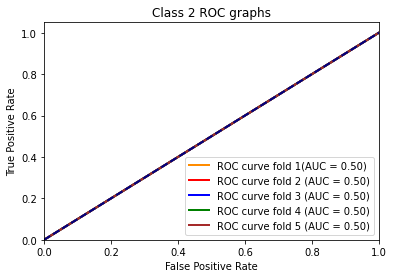

In [33]:
plt.figure()
lw = 2
plt.plot(
    class_2_fpr[0],
    class_2_tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve fold 1(AUC = %0.2f)" % class_2_roc_auc[0],
)
plt.plot(
    class_2_fpr[1],
    class_2_tpr[1],
    color="red",
    lw=lw,
    label="ROC curve fold 2 (AUC = %0.2f)" % class_2_roc_auc[1],
)
plt.plot(
    class_2_fpr[2],
    class_2_tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve fold 3 (AUC = %0.2f)" % class_2_roc_auc[2],
)
plt.plot(
    class_2_fpr[3],
    class_2_tpr[3],
    color="green",
    lw=lw,
    label="ROC curve fold 4 (AUC = %0.2f)" % class_2_roc_auc[3],
)

plt.plot(
    class_2_fpr[4],
    class_2_tpr[4],
    color="brown",
    lw=lw,
    label="ROC curve fold 5 (AUC = %0.2f)" % class_2_roc_auc[4],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Class 2 ROC graphs")
plt.legend(loc="lower right")
plt.show()

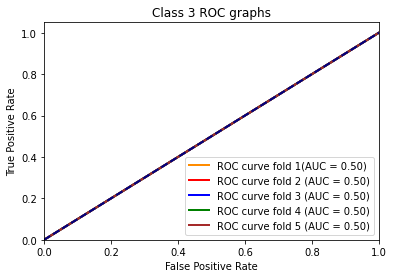

In [34]:
plt.figure()
lw = 2
plt.plot(
    class_3_fpr[0],
    class_3_tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve fold 1(AUC = %0.2f)" % class_3_roc_auc[0],
)
plt.plot(
    class_3_fpr[1],
    class_3_tpr[1],
    color="red",
    lw=lw,
    label="ROC curve fold 2 (AUC = %0.2f)" % class_3_roc_auc[1],
)
plt.plot(
    class_3_fpr[2],
    class_3_tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve fold 3 (AUC = %0.2f)" % class_3_roc_auc[2],
)
plt.plot(
    class_3_fpr[3],
    class_3_tpr[3],
    color="green",
    lw=lw,
    label="ROC curve fold 4 (AUC = %0.2f)" % class_3_roc_auc[3],
)

plt.plot(
    class_3_fpr[4],
    class_3_tpr[4],
    color="brown",
    lw=lw,
    label="ROC curve fold 5 (AUC = %0.2f)" % class_3_roc_auc[4],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Class 3 ROC graphs")
plt.legend(loc="lower right")
plt.show()

In [35]:
cm = multilabel_confusion_matrix(actual_classes, predicted_classes)

res = []

for l in [0,1,2]:
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l+1,sensitivity, specificity, f1])

frame = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

total_accuracy = accuracy_score(actual_classes, predicted_classes)
print("The total accuracy is", total_accuracy)

The total accuracy is 0.3333333333333333


In [29]:
frame

,Class,Sensitivity(Recall),Specificity,F1 score
0,1,0.4,0.6,0.363636
1,2,0.0,1.0,NaN
2,3,0.6,0.4,0.428571
